In [81]:
import numpy as np
import matplotlib.pyplot as plt

Topics
  * Differential equations with indicator functions, and,
  * PyPlot and NumPy, of course.

___

Reference: Zill's First Course in Differential Equations with Modelling Applications 11th edition, chapters 3.1 and 3.2.

**Exercise 1.**
_A Simple Introduction to Indicator Functions._

Consider the following differential equation:

$$
y' + 2y = f(t)
$$

where 

$$
f(t) = \left\{
\begin{array}{ll}
      1, & 0 ≤ t < 1 \\
      0, &  1 ≤ t \\
\end{array}
\right.
$$

with initial condition

$$
y(0) = 0
$$

Plot the graph of $y$ with respect to $t$, for $0 \leq t \leq 3$.

---

We can rewrite the differential equation as

$$
\frac{dy}{dt} = -2y + f(t),
$$

which we can think of as

$$ \frac{dy}{dt} = \left\{
\begin{array}{ll}
      -2y + 1, & 0 ≤ t < 1 \\
      -2y, &  1 ≤ t \\
\end{array}
\right.
$$

In [150]:
def dy_dx(t_i, y_i):
    result = (-2 * y_i) + (1 * (t_i < 1))
    return result

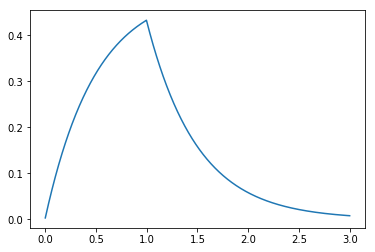

In [152]:
t = np.linspace(0, 3, 1000)
h = t[1] - t[0]

y = np.array([0])

for i in range(len(t)):
    y_change = dy_dx(t[i], y[i])
    y_new = y[i] + h * y_change
    y = np.append(y, y_new)
    
plt.plot(t, y[1:])
plt.show()

**Exercise 2, part a.**
_The Logistic Equation_

A common model for population is the logistic equation, which is given by the following differential equation:

$$
\frac{dP}{dt} = P(a - bP)
$$

Assuming $a = \frac{2}{3}, b = \frac{1}{100}$, and an initial population of 10, graph the population $P$ with respect to time, $t$.

In [189]:
def dP_dt(P_i, a, b):
    result = P_i * (a - (b * P_i))
    return result

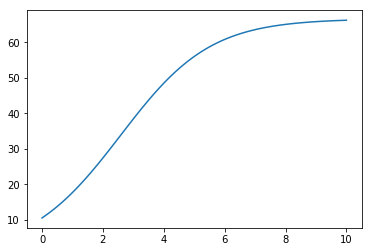

In [190]:
t = np.linspace(0, 10, 100)
h = t[1] - t[0]

a = 2/3
b = 1/100

P = np.array([10])

for i in range(len(t)):
    P_change = dP_dt(P[i], a, b)
    P_new = P[i] + h*P_change
    P = np.append(P, P_new)
    
plt.plot(t, P[1:])
plt.show()

**Exercise 2, part b.**
_A Modification on the Logistic Equation_

The logistic equation can be modified to include a "harvesting" term. I.e., this term accounts for a routine reduction in the population. 

For example, modifying the previous equation to include a harvesting term looks like:

$$
\frac{dP}{dt} = P(a-bP) - \frac{P}{5}
$$

---

Now, assume that the population is not harvested until $t = 5$.
Then, our differential equation is written:

$$
\frac{dP}{dt} = \left\{
\begin{array}{ll}
    P(a-bP), & 0 \leq t < 5 \\
    P(a-bP) - \frac{P}{5}, & 5 \leq t \\
\end{array}
\right.
$$

---

With $a, b$, and the initial population the same as part a, graph the population $P$ with respect to time $t$, first without the indicator function, then, with the indicator function.

In [191]:
# first, without the indicator function

In [192]:
def dP_dt(a, b, P_i):
    result = (P_i * (a - (b * P_i))) - (P_i / 5)
    return result

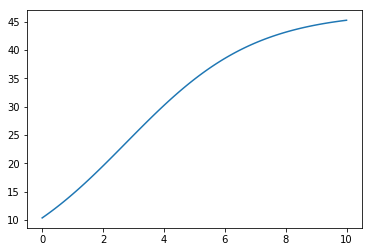

In [193]:
t = np.linspace(0, 10, 100)
h = t[1] - t[0]

a = 2/3
b = 1/100

P = np.array([10])

for i in range(len(t)):
    P_change = dP_dt(a, b, P[i])
    P_new = P[i] + h*P_change
    P = np.append(P, P_new)
    
plt.plot(t, P[1:])
plt.show()

In [194]:
# now, with the indicator function, kicking in at t = 5

In [195]:
def dP_dt(a, b, P_i, t_i, t_v):
    result = (P_i * (a - (b * P_i))) - (P_i / 5)*(t_i >= t_v)
    return result

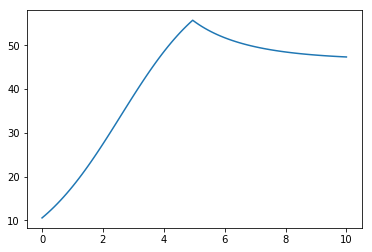

In [196]:
t = np.linspace(0, 10, 100)
h = t[1] - t[0]

a = 2/3
b = 1/100
t_v = 5

P = np.array([10])

for i in range(len(t)):
    P_change = dP_dt(a, b, P[i], t[i], t_v)
    P_new = P[i] + h*P_change
    P = np.append(P, P_new)
    
plt.plot(t, P[1:])
plt.show()

**Exercise 3.** _Newton's Law of Cooling/Warming_

Newton's empirical law of cooling states that the temperature of some object $T$ with respect to time $t$, when placed in an environment with some ambient temperature $T_m$, satisfies the following differential equation:

$$
\frac{dT}{dt} = k(T-T_m)
$$

where $k$ is some constant. For this exercise, take $T$ and $T_m$ to be temperatures in Fahrenheit.

---

Suppose we are baking a cake.
The cake is placed in an oven which has **not** been preheated; they are both initially at room temperature, 70˚ F.

Over the course of the next 4 minutes, the temperature of the oven increases linearly to 300˚.
The cake is then remains in the oven for an additional 16 minutes. 

Suppose $k = \frac{1}{3}\text{log}\left( \frac{13}{23} \right)$ (where log is the natural logarithm), and plot the graph of the temperature of the cake, $T$ with respect to time, $t$.

---

We first calculate $T_m$ at each time $t$.
We know that:
  * $T_m(0) = 70$
  * $T_m(4) = 300$
  * While $0 \leq t < 4$, $T_m$ increases linearly

During this period of increase, we calculate the slope:

$$
m = \frac{300-70}{4-0} = \frac{115}{2}
$$

So, we can express $T_m$ thusly:

$$
T_m = \left\{
\begin{array}{ll}
       70 + \frac{115}{2}t, & 0 ≤ t < 4 \\
       300, & 4 \leq t \leq 20.\\
\end{array}
\right.
$$

In [96]:
def dT_dt(k, T_i, t_i):
    result = k * ( T_i - ( (70 + 115*t_i/2)*(0 <= t_i < 4) + (300)*(4 <= t_i) ) )
    return result

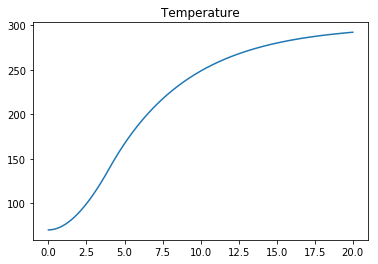

In [103]:
t = np.linspace(0, 20, 2000)
h = t[1] - t[0]
k = (1/3) * np.log(13/23)

T = np.array([70])

for i in range(len(t)):
    T_change = dT_dt(k, T[i], t[i])
    T_new = T[i] + h*T_change
    T = np.append(T, T_new)
    
plt.plot(t, T[1:])
plt.title('Temperature')
plt.show()

**Exercise 4.** _Circuits_

For a circuit, 
  * $R$ the resistance in ohms, 
  * $L$ is the inductance in henry, 
  * $i(t)$ is the current $i$ with respect to time $t$, and,
  * $E(t)$ is the impressed voltage, again with respect to time $t$.

In a circuit, Kirchoff's second law states that the sum of the voltage drop across the inductor ($L(di/dt)$) and the voltage drop across the resistor ($iR$) is the same as the impressed voltage ($E(t)$) on the circuit. 

So, we can use the following differential equation to model this sytem:

$$
L\frac{di}{dt} + Ri = E(t)
$$

--- 

Suppose the following electromotive force

$$
E(t) = \left\{
\begin{array}{ll}
       120, & 0 ≤ t < 20 \\
       0, & 20 ≤ t \\
\end{array}
\right.
$$

is applied to an $LR$-series circuit \[a circuit as above\] in which the inductance is 20 henry and the resistance is 2 ohms.
Plot the graph of the current with respect to time, given that $i(0)=0$.

---

From the above, we have:
  * Inductance, $L = 20$,
  * Resistance, $R = 2$,
  * Initial value of current, $i(0) = 0$.

Since we have $L \neq 0$, we can rearrange the differential equation, solving for $\frac{di}{dt}$,

$$
\frac{di}{dt} = \frac{E(t) - R\cdot i(t)}{L}
$$

In [113]:
def di_dt(R, i_t, L, t):
    result = ( (120 * (0 <= t < 20)) - (R * i_t) ) / L
    return result

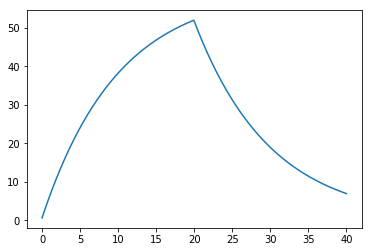

In [197]:
t = np.linspace(0, 40, 400)
h = t[1] - t[0]

L = 20
R = 2

i = np.array([0])

for k in range(len(t)):
    i_change = di_dt(R, i[k], L, t[k])
    i_new = i[k] + h*i_change
    i = np.append(i, i_new)
    
plt.plot(t, i[1:])
plt.show()

**Exercise 5.** _Revisiting Harvesting Populations_

From last tutorial, recall that we can model a population with seasonal fluctuations with the following differential equation:

$$
\frac{dP}{dt} = P(t)(k\cdot\text{cos}(t)),
$$

where $k$ is some positive constant.

Suppose now that after $t=15$ units of time, a flat rate of the population is continuously harvested. Our differential equation now reads, for some positive constant $s$:

$$
\frac{dP}{dt} = \left\{
\begin{array}{ll}
    P(t)(k\cdot\text{cos}(t)), & 0 \leq t < t_v \\
    P(t)(k\cdot\text{cos}(t)) - s, & t_v \leq t \leq 30 \\
\end{array}
\right.
$$

Plot the graph of population with respect to time. Assume an initial population of 100, as well as $k = \frac{1}{10}$, $s = 5$, and $t_v = 15$.

In [206]:
def dP_dt(P_i, t_i, k, s, t_v):
    result = P_i * (k * np.cos(t_i)) - s * (t_i >= t_v)
    return result

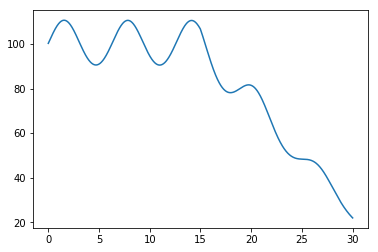

In [207]:
t = np.linspace(0, 30, 1000)
h = t[1] - t[0]

k = 1/10
s = 5
t_v = 15

P = np.array([100])

for i in range(len(t)):
    P_change = dP_dt(P[i], t[i], k, s, t_v)
    P_new = P[i] + h*P_change
    P = np.append(P, P_new)
    
plt.plot(t, P[1:])
plt.show()